In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# the specifications are for jupyter earth system
R_planet = 70000
R_star = 695842
angle = np.pi/2
P = 1
a = 778000000

In [3]:
delta = (R_planet/R_star)**2
transit_t = (P/np.pi)*np.arcsin((((R_star + R_planet)**2 - (a*np.cos(angle))**2)**0.5)/(a*np.sin(angle)))
transit_f = (P/np.pi)*np.arcsin((((R_star - R_planet)**2 - (a*np.cos(angle))**2)**0.5)/(a*np.sin(angle)))

In [4]:
def linear(a,b,c,d,t):
    y = b + ((d-b)/(c-a)*(t-a))
    return y

In [5]:
t=[]
t = np.arange(0.499*P,0.501*P,(transit_t - transit_f)/20)
y =[]

for i in range (0,len(t),1):
    if (t[i] <= 0.5*P or t[i] > (0.5*P + transit_t)) :
        y.append(1)
    elif (t[i]>0.5*P and t[i] <= (0.5*P + (transit_t - transit_f)/2)):
            y.append(linear(0.5*P,1,0.5*P+(transit_t - transit_f)/2,1-delta,t[i]))
    elif  (t[i]>(0.5*P + (transit_t + transit_f)/2) and t[i] <=(0.5*P + transit_t)):
            y.append(linear(0.5*P+(transit_t + transit_f)/2,1-delta,0.5*P+transit_t,1,t[i]))
    else :
            y.append(1 - delta)                 

        

Text(0, 0.5, 'relative_intensity')

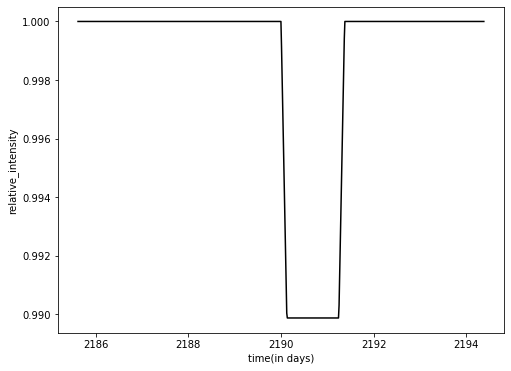

In [6]:
plt.figure(figsize=(8,6))
plt.plot(t*12*365,y,'k')
plt.xlabel('time(in days)')
plt.ylabel('relative_intensity')

In [7]:
alpha = transit_t*np.pi/P
print(alpha)


0.0009843729096172542


In [8]:
# correction for limb darkening
# finding angle 
def param(time):
    r = ((a*np.sin(angle)*np.sin(alpha-(2*alpha*time/transit_t)))**2 + (a*np.cos(angle))**2)**0.5
    mu = (1-(r/(R_star+R_planet))**2)**0.5
   
    return mu


In [60]:
#Here I means relative intensity 
#linear model

def lin(mu):
    u = 0.3
    return  1- u*(1-mu)

#quadratic law

def quad(mu):
    u1 = 0.1
    u2 = 0.2
    return  1- u1*(1-mu) -u2*(1-mu)**2
#non-linear law
def nonlinear(mu):
    u1 = 0.05
    u2 = 0.05
    u3 = 0.15
    u4 = 0.05
    return  1-u1*(1-mu**0.5) -u2*(1-mu)-u3*(1 -mu**1.5)-u4*(1 - mu**2)

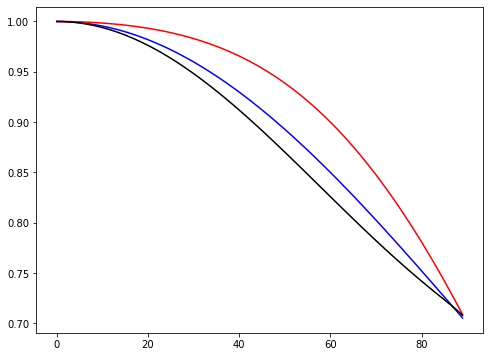

In [61]:
#luminosity vs angle

rads = np.arange(0,90,1)
z1 = []
z2 = []
z3 = []
for i in range (0,len(rads),1):
    z1.append(lin(np.cos(rads[i]*np.pi/180)))
    z2.append(quad(np.cos(rads[i]*np.pi/180)))
    z3.append(nonlinear(np.cos(rads[i]*np.pi/180)))

plt.figure(figsize=(8,6))
plt.plot(rads,z1,'b')
plt.plot(rads,z2,'r')
plt.plot(rads,z3,'k')

In [62]:
I_avg = 1       #since we are plotting relative intensity w.r.t to avg_intesity of star we need to find I_avg (without planet)

I_center = 1/0.9  #this is assumed not calculated 

mu2 = param(0)
I2 = lin(mu2)
delta2 = I2*delta/0.9
print(delta2)

0.007871007630948598


In [63]:



#plotting light curve
#assuming R_planet << R_star
tim = []
tim = np.arange(0.5*P-transit_t,0.5*P+2*transit_t,(transit_t-transit_f)/30)
intensity_l= []
intensity_q = []
intensity_nl = []
j = 0 
for k in range (0,len(tim),1):
    if tim[k] <= 0.5*P  :
        intensity_l.append(1)
        intensity_q.append(1)
        intensity_nl.append(1)
        j=j+1
    
   
        
        
    elif tim[k] > 0.5*P + transit_t:
        intensity_l.append(1)
        intensity_q.append(1)
        intensity_nl.append(1)
        
        
        
        
    elif (tim[k] > (0.5*P + (transit_t - transit_f)/2) and (tim[k]<=(0.5*P + (transit_t + transit_f)/2))):
        mu =param(tim[k] - tim[j])
        I_l = lin(mu)                                    # here I is intensity with respect to max intensity i.e at center
        I_q = quad(mu)
        I_nl = nonlinear(mu)
        
        
        delta_l = I_l*delta/0.9                      # I_avg is average intensity /max_intensity i.e (I_center)
        delta_q = I_q*delta/0.9
        delta_nl= I_nl*delta/0.9
        
        intensity_l.append(1-delta_l) 
        intensity_q.append(1-delta_q)
        intensity_nl.append(1-delta_nl)
        
    else:
        intensity_l.append(0)
        intensity_q.append(0)
        intensity_nl.append(0)
        
        
t1 = np.asarray(intensity_l)        
tim = tim[t1!=0]        
        
while 0 in intensity_l:
    intensity_l.remove(0)
    intensity_q.remove(0)
    intensity_nl.remove(0)

Text(0, 0.5, 'relative_intensity')

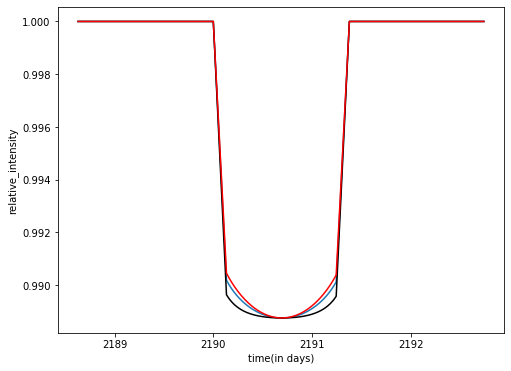

In [64]:
plt.figure(figsize=(8,6))
plt.plot(tim*12*365,intensity_l)
plt.plot(tim*12*365,intensity_q,'k')
plt.plot(tim*12*365,intensity_nl,'r')


plt.xlabel('time(in days)')
plt.ylabel('relative_intensity')

Text(0, 0.5, 'relative_intensity')

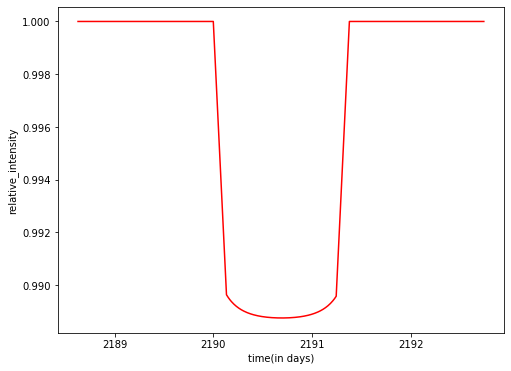

In [65]:
plt.figure(figsize=(8,6))
plt.plot(tim*12*365,intensity_q,'r')
plt.xlabel('time(in days)')
plt.ylabel('relative_intensity')

Text(0, 0.5, 'relative_intensity')

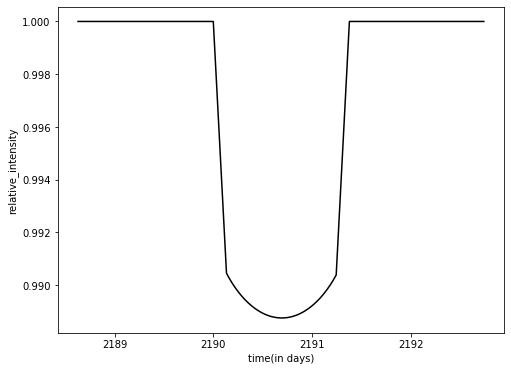

In [66]:
plt.figure(figsize=(8,6))
plt.plot(tim*12*365,intensity_nl,'k')
plt.xlabel('time(in days)')
plt.ylabel('relative_intensity')

In [45]:
# ok now lets introduce planet luminosity
r_coeff = 1
L_planet  = r_coeff*I_avg/4*(R_planet/a)**2

print(L_planet)

2.0238433528723704e-09


In [51]:
#including planet lminosity
Temp_star = 5700
Temp_planet = 140        # these vales are of sun and jupyter

#intensity by planet is calculated by stefan boltzmann law
#the ratio of intensity of star to that of planet is proportional to ratio of respective temperature at longer wavelengths
#assuming planet and star act as black body

I_planet = (Temp_planet/Temp_star)   #I_planet w.r.t to star


delta_occ  = (L_planet+I_planet)*(R_planet/R_star)**2
print(delta_occ)

0.0002485581561951918


In [52]:
mu3 = param(0)
I3 = lin(mu3)
delta3 = (I3-I_planet)*delta/0.9

In [53]:

#plotting light curve
tim1 = []
tim1 = np.arange(0,P,(transit_t-transit_f)/30)
intensity_l1= []

z = 0 
for k in range (0,len(tim1),1):
    if tim1[k] <= 0.25*P  :
        intensity_l1.append(1)
        z=z+1

    
    
    
    elif (tim1[k] > (0.25*P + (transit_t - transit_f)/2) and (tim1[k]<=(0.25*P + (transit_t + transit_f)/2))):
        mu =param(tim1[k]  - tim1[z])
        I_l = lin(mu) 
        delta_l = (I_l-I_planet)*delta*I_center/I_avg                      # I_avg is average intensity /max_intensity i.e (I_center)
        intensity_l1.append(1-delta_l) 
    elif  tim1[k] >= 0.75*P and tim1[k]<(0.75*P + transit_t):
        intensity_l1.append((1-delta_occ))
    elif  (tim1[k] >= (0.25*P + transit_t) and tim1[k] < 0.75*P ) or tim1[k] >= 0.75*P + transit_t:
        intensity_l1.append(1)
    else :
        intensity_l1.append(0)
   
t = np.asarray(intensity_l1)          
tim1 = tim1[t!=0]   
while 0 in intensity_l1:
    intensity_l1.remove(0)
        


Text(0, 0.5, 'relative_intensity')

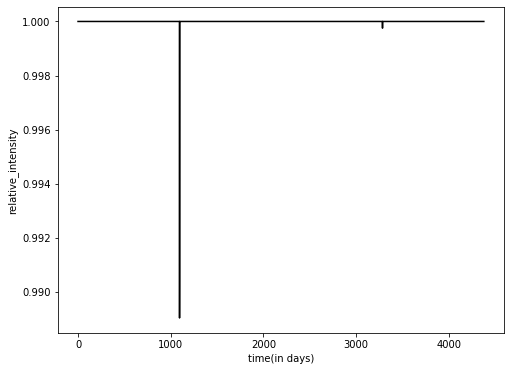

In [54]:
plt.figure(figsize=(8,6))
plt.plot(tim1*365*12,intensity_l1,'k')

plt.xlabel('time(in days)')
plt.ylabel('relative_intensity')

In [88]:
delta_occ

0.00030480904624975046